In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [26]:
# import data ,I have collected data from different resources and then put them in one file
data=pd.read_csv('S&P.csv',index_col=0,parse_dates=True,na_values=["",".","0","null"])
data.head(3)

,S&P,1YTBILL,3MTBILL,6MTBILL,OILB,OILT,FED,USD/EUR,GOLD,USD/CNY,USD/GBP
Date,,,,,,,,,,,
2009-01-02,931.799988,0.38,0.08,0.28,42.94,46.17,0.08,0.7176,869.75,6.80,0.6896
2009-01-05,927.450012,0.41,0.14,0.32,45.84,48.61,0.11,0.7334,860.00,6.82,0.6865
2009-01-06,934.700012,0.42,0.14,0.31,48.89,48.56,0.09,0.7476,844.00,6.83,0.6809


In [27]:
# the first step is check correlation between S&P 500 and inputs
corr=data.corr()
corr

,S&P,1YTBILL,3MTBILL,6MTBILL,OILB,OILT,FED,USD/EUR,GOLD,USD/CNY,USD/GBP
S&P,1.000000,0.772188,0.786958,0.785081,-0.401122,-0.447292,0.801194,0.738190,-0.002773,0.178569,0.742263
1YTBILL,0.772188,1.000000,0.984906,0.994850,-0.410710,-0.451536,0.971776,0.513974,-0.130463,0.526192,0.778590
3MTBILL,0.786958,0.984906,1.000000,0.996555,-0.329345,-0.378659,0.994356,0.490485,-0.033128,0.502027,0.763354
6MTBILL,0.785081,0.994850,0.996555,1.000000,-0.370364,-0.417303,0.987697,0.507199,-0.073953,0.511921,0.775645
OILB,-0.401122,-0.410710,-0.329345,-0.370364,1.000000,0.973713,-0.341094,-0.711878,0.643472,-0.529334,-0.626219
OILT,-0.447292,-0.451536,-0.378659,-0.417303,0.973713,1.000000,-0.392289,-0.763903,0.519507,-0.504387,-0.665344
FED,0.801194,0.971776,0.994356,0.987697,-0.341094,-0.392289,1.000000,0.514469,-0.016524,0.511294,0.778719
USD/EUR,0.738190,0.513974,0.490485,0.507199,-0.711878,-0.763903,0.514469,1.000000,-0.158504,0.287996,0.780883
GOLD,-0.002773,-0.130463,-0.033128,-0.073953,0.643472,0.519507,-0.016524,-0.158504,1.000000,-0.322429,-0.121290
USD/CNY,0.178569,0.526192,0.502027,0.511921,-0.529334,-0.504387,0.511294,0.287996,-0.322429,1.000000,0.628097


In [28]:
# sort correlation
corr['S&P'].sort_values(ascending=False)

S&P        1.000000
FED        0.801194
3MTBILL    0.786958
6MTBILL    0.785081
1YTBILL    0.772188
USD/GBP    0.742263
USD/EUR    0.738190
USD/CNY    0.178569
GOLD      -0.002773
OILB      -0.401122
OILT      -0.447292
Name: S&P, dtype: float64

In [29]:
# removing inputs with weak correlation
data.drop(['GOLD','USD/CNY','OILB'],axis=1,inplace=True)
data

,S&P,1YTBILL,3MTBILL,6MTBILL,OILT,FED,USD/EUR,USD/GBP
Date,,,,,,,,
2009-01-02,931.799988,0.38,0.08,0.28,46.17,0.08,0.7176,0.6896
2009-01-05,927.450012,0.41,0.14,0.32,48.61,0.11,0.7334,0.6865
2009-01-06,934.700012,0.42,0.14,0.31,48.56,0.09,0.7476,0.6809
2009-01-07,906.650024,0.41,0.11,0.29,42.75,0.11,0.7327,0.6596
2009-01-08,909.729980,0.41,0.09,0.28,41.68,0.10,0.7289,0.6579
...,...,...,...,...,...,...,...,...
2019-12-23,3224.010010,1.49,1.56,1.56,60.51,1.55,0.9020,0.7736
2019-12-24,3223.379883,1.49,1.55,1.57,61.17,1.55,0.9030,0.7723
2019-12-26,3239.909912,1.49,1.55,1.57,61.72,1.55,NaN,NaN


In [30]:
# removing missing data 
data.dropna(inplace=True)

In [31]:
# categorize S&P 500 into two category , 0 for downward trend and 1 for upward trend,using MACD indicator for categorizing 
mean_12=data['S&P'].rolling(window=12).mean()
mean_26=data['S&P'].rolling(window=26).mean()
mean_12=mean_12.iloc[27:]
mean_26=mean_26.iloc[27:]
data=data.iloc[27:,:]
data['target']=0
for i in range(len(mean_12)):
    if mean_12.iloc[i]<mean_26.iloc[i]:
        data['target'][i]=0
    else:
        data['target'][i]=1
data.head(3)

C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

,S&P,1YTBILL,3MTBILL,6MTBILL,OILT,FED,USD/EUR,USD/GBP,target
Date,,,,,,,,,
2009-02-11,833.739990,0.59,0.30,0.45,35.93,0.22,0.7751,0.6968,0
2009-02-12,835.190002,0.57,0.29,0.42,34.03,0.23,0.7828,0.7019,0
2009-02-13,826.840027,0.60,0.29,0.45,37.63,0.22,0.7745,0.6928,0


In [32]:
# now  don't need S&P 500 price so S&P 500 column has been removed
data=data.iloc[:,1:]
data.head(3)

,1YTBILL,3MTBILL,6MTBILL,OILT,FED,USD/EUR,USD/GBP,target
Date,,,,,,,,
2009-02-11,0.59,0.30,0.45,35.93,0.22,0.7751,0.6968,0
2009-02-12,0.57,0.29,0.42,34.03,0.23,0.7828,0.7019,0
2009-02-13,0.60,0.29,0.45,37.63,0.22,0.7745,0.6928,0


In [33]:
# define X and y , in this case there are 7 inputs and 1 output
X=data.iloc[:,:7]
y=data.iloc[:,7]
X.head(3)

,1YTBILL,3MTBILL,6MTBILL,OILT,FED,USD/EUR,USD/GBP
Date,,,,,,,
2009-02-11,0.59,0.30,0.45,35.93,0.22,0.7751,0.6968
2009-02-12,0.57,0.29,0.42,34.03,0.23,0.7828,0.7019
2009-02-13,0.60,0.29,0.45,37.63,0.22,0.7745,0.6928


In [34]:
# split data to 80% train and 20% test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [35]:
# distribution of two categories for train set
y_train.value_counts()

1    1422
0     701
Name: target, dtype: int64

In [36]:
# distribution of two categories for test set
y_test.value_counts()

1    355
0    176
Name: target, dtype: int64

In [37]:
#standardized the inputs 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train

array([[ 0.69353646,  0.68473087,  0.71005368, ...,  0.80062813,
         0.2987902 ,  1.12381883],
       [-0.69631879, -0.55686657, -0.60091685, ..., -0.57493544,
        -0.58229716, -0.92993224],
       [ 1.97647978,  1.67266862,  1.80915019, ...,  1.53607795,
         0.19362402,  0.63295776],
       ...,
       [-0.80323074, -0.67702116, -0.74658024, ..., -0.67027153,
        -0.92088094, -0.93721504],
       [-0.78986674, -0.65032014, -0.72009599, ..., -0.65665209,
        -0.9888542 , -1.23144037],
       [-0.65622682, -0.55686657, -0.61415898, ..., -0.60217433,
        -0.12828708, -0.69833903]])

In [38]:
# because everytime that runs the model won't get different results I fixed the random data 
tf.random.set_seed(42)

# Vanila Neural Network

In [39]:
# build a vanilla neural network with just one hidden layer, and a dropout layer for avoiding overfitting,the loss function is hinge and 
#loss function is Adam
def build_model(neuron=14,activation='tanh',lr=0.001):
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neuron,input_dim=7,activation=activation,kernel_initializer='normal'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(neuron,activation=activation,kernel_initializer='normal'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid',kernel_initializer='normal'))
    opt=tf.keras.optimizers.Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [40]:
# using different range of  hidden layer neurons and activation function for hyperparameter tuning
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model,epochs=500,verbose=0)
from sklearn.model_selection import GridSearchCV
lr=[0.001,0.01,0.1]
neuron=[21,84]
activation=['relu','tanh']
param_grid = dict(neuron=neuron,activation=activation,lr=lr)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

In [41]:
grid_result.best_params_

{'activation': 'relu', 'lr': 0.001, 'neuron': 84}

In [42]:
grid_result.best_score_

0.7630727887153625

In [43]:
#  use best parameter from hyperparameter tuning  to build the model and also check the best learning rate 
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(grid_result.best_params_['neuron'],input_dim=7,activation=grid_result.best_params_['activation'],kernel_initializer='normal'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(grid_result.best_params_['neuron'],activation=grid_result.best_params_['activation'],kernel_initializer='normal'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1,kernel_initializer='normal',activation='sigmoid'))
opt = tf.keras.optimizers.Adam(lr=grid_result.best_params_['lr'])
model.compile(loss='binary_crossentropy', optimizer=opt , metrics=['accuracy'])

In [44]:
history=model.fit(X_train, y_train,validation_data=[X_test,y_test],epochs=1000,verbose=0)

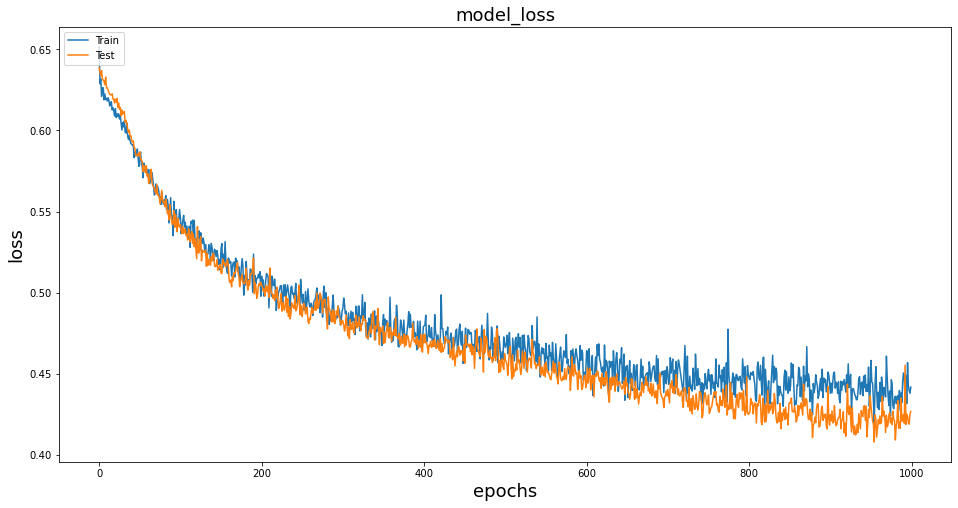

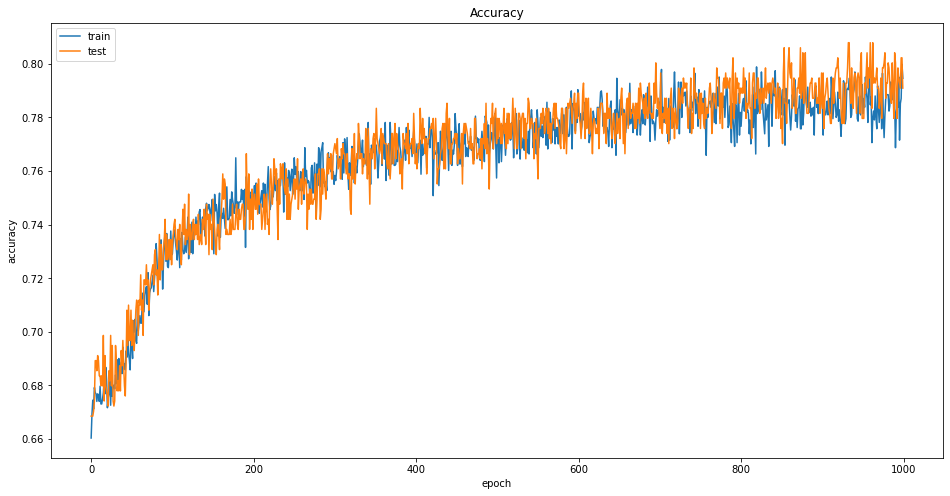

In [45]:
# plot loss and accuracy of train and test to compare and check for overfitting and underfitting
def plot_loss_acc():
    plt.figure(figsize=(16,8))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs',fontsize=18)
    plt.ylabel('loss',fontsize=18)
    plt.title('model_loss',fontsize=18)
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    plt.figure(figsize=(16,8))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show() 
plot_loss_acc()

In [46]:
#train accuracy and loss
train_acc = model.evaluate(X_train, y_train)
train_acc

2123/2123 [==============================] - 0s 73us/sample - loss: 0.3813 - accuracy: 0.8229


[0.3813025602124179, 0.8228921]

In [47]:
# test accuracy and loss
test_acc = model.evaluate(X_test, y_test)
test_acc

531/531 [==============================] - 0s 75us/sample - loss: 0.4269 - accuracy: 0.7910


[0.42692310746106726, 0.79096043]

In [48]:
# performance of model
from sklearn.metrics import classification_report
y_pred=model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.44      0.58       176
           1       0.78      0.97      0.86       355

    accuracy                           0.79       531
   macro avg       0.82      0.70      0.72       531
weighted avg       0.81      0.79      0.77       531

